# Attention Basics!

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision

import torch.nn.functional as F

from tqdm.notebook import trange, tqdm

In [8]:
data_set_root = "../../datasets"

In [38]:
dataset = datasets.MNIST(data_set_root, train=True, download=True, transform=transforms.ToTensor())

num_of_examples = 100
dataset_tensor = dataset.data.reshape(-1, 28*28)[:num_of_examples].float()
dataset_tensor /= 255

## Indexing a Dataset
At this point we would be familiar with indexing a tensor/array with an integer index!

In [301]:
# Define our index value
q_index = 4

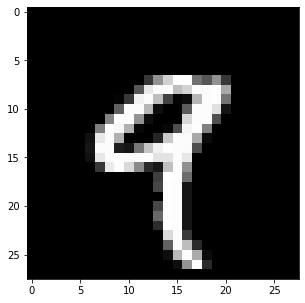

In [302]:
# Lets visualise the image at this index!
plt.figure(figsize = (5,5))
_ = plt.imshow(dataset_tensor[q_index].reshape(28, 28).numpy(), cmap="gray")

## Indexing a Dataset with Matrix Multiplication
Did you know we can do the same thing, but using Matrix multiplication?

In [353]:
# Turn our index into a ont-hot-coded vector the sample length as the number of samples
# we will call this our "query" vector (q)
q_one_hot_vec = F.one_hot(torch.tensor([q_index]), num_of_examples)

# Create a unique one-hot-coded vector for every image in our set
# we will call this our "key" vector (k)
k_one_hot = F.one_hot(torch.arange(num_of_examples), num_of_examples)

# Randomly shuffle the keys and dataset to show that we will find the target image
# even in a randomly organised dataset
rand_perm = torch.randperm(num_of_examples)
k_one_hot = k_one_hot[rand_perm]
dataset_tensor_random = dataset_tensor[rand_perm]

In [354]:
# Multiply our key vector 
index_map = torch.mm(q_one_hot_vec, k_one_hot.t()).float()

In [356]:
output = torch.mm(index_map, dataset_tensor_random)

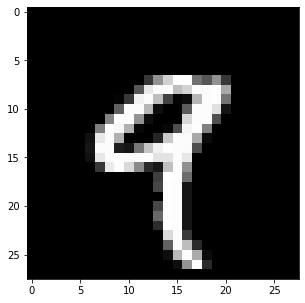

In [357]:
# Lets visualise the image at this index!
plt.figure(figsize = (5,5))
_ = plt.imshow(output.reshape(28, 28).numpy(), cmap="gray")

## Attention as a "Soft" Look-up
What if we don't use "hard" one-hot coded vectors?

In [385]:
# Define the size for each of the vectors
vec_size = 128

# Create a random query vector
q_random_vec = torch.randn(1, vec_size)

# Create a random key vector for each image in the dataset
random_keys = torch.randn(num_of_examples, vec_size)

# Calculate an "attention map" 
attention_map = torch.mm(q_random_vec, random_keys.t()).float()

# Calculate the Softmax over the all over the attention map
attention_map = F.softmax(attention_map, 1)

# Use the attention map to soft "index" over the dataste
output = torch.mm(attention_map, dataset_tensor)

In [386]:
print("The largest Softmax value is %f" % attention_map.max().item())

The largest Softmax value is 0.998018


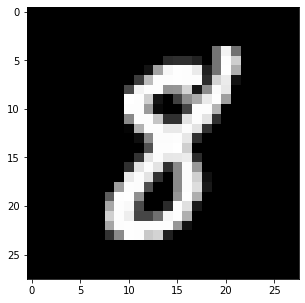

In [387]:
# Lets visualise the image we get as a result!
plt.figure(figsize = (5,5))
_ = plt.imshow(output.reshape(28, 28).numpy(), cmap="gray")